# GROUP 10

## SPOTIFY SONG POPULARITY PREDICTION

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
# Read data 
songs = pd.read_csv('song_data.csv') 

# displays the first five rows
songs.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


# Data Exploration and Preprocessing 

In [91]:
# raw data size

songs.shape

(18835, 15)

In [92]:
# checking Data types of the attributes
songs.dtypes

song_name            object
song_popularity       int64
song_duration_ms      int64
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
audio_mode            int64
speechiness         float64
tempo               float64
time_signature        int64
audio_valence       float64
dtype: object

In [93]:
# removes duplicates

songs = songs.drop_duplicates(subset=['song_name'],keep='first')
songs.shape

(13070, 15)

In [94]:
# converts milliseconds to minutes

songs['song_duration_ms'] = songs['song_duration_ms']/1000/60

In [95]:
# renames song duration column to indicate minutes instead of milliseconds

songs = songs.rename(columns={'song_duration_ms': 'song_duration_min',})

In [96]:
# removes songs longer than 15 minutes

songs = songs[songs['song_duration_min']<=15]

In [97]:
# drops song_name column

songs = songs.drop(['song_name'],axis = 1)

In [98]:
#Checking for null values in our data
[sum(songs[i].isnull()) for i in songs.columns] 
#we dont have any null values in our data

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [99]:
# Checks if there is any variables with zero variance
songs.std() 
# we dont have any varible with zero variance so we dont need to drop any at this point

song_popularity      20.108609
song_duration_min     1.000740
acousticness          0.301748
danceability          0.159083
energy                0.223955
instrumentalness      0.246537
key                   3.583572
liveness              0.145383
loudness              4.107099
audio_mode            0.482021
speechiness           0.105018
tempo                29.103137
time_signature        0.319339
audio_valence         0.248635
dtype: float64

In [100]:
# summary statistics for the dataset
songs.describe()

,song_popularity,song_duration_min,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,13066.000000,13066.000000,13066.000000,13066.000000,13066.000000,13066.000000,13066.000000,13066.000000,13066.000000,13066.000000,13066.000000,13066.000000,13066.000000,13066.000000
mean,48.490357,3.637970,0.277738,0.625059,0.635718,0.096644,5.319455,0.180514,-7.788922,0.632940,0.100787,121.146708,3.951554,0.528628
std,20.108609,1.000740,0.301748,0.159083,0.223955,0.246537,3.583572,0.145383,4.107099,0.482021,0.105018,29.103137,0.319339,0.248635
min,0.000000,0.200000,0.000001,0.000000,0.001070,0.000000,0.000000,0.011900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37.000000,3.048996,0.025000,0.525000,0.490000,0.000000,2.000000,0.093300,-9.537250,0.000000,0.037300,98.066750,4.000000,0.334000
50%,51.000000,3.524433,0.147000,0.637000,0.667000,0.000022,5.000000,0.121000,-6.859000,1.000000,0.054400,120.025000,4.000000,0.529000
75%,63.000000,4.074804,0.479750,0.741000,0.815000,0.005910,8.000000,0.223000,-5.041000,1.000000,0.115000,139.955750,4.000000,0.730000
max,100.000000,14.448150,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


Text(0.5, 1.0, 'Correlation Heatmap between variables')

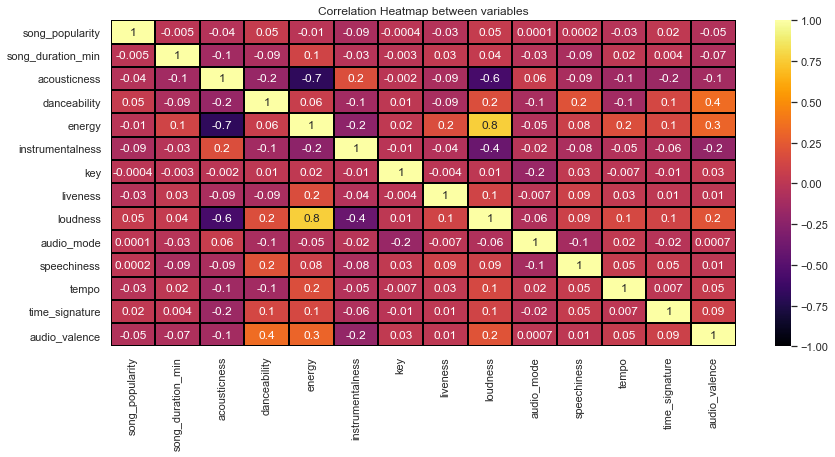

In [101]:
#Plotting heat map to see the correlaiton among the variables 
songs_corr= songs.corr()
plt.figure(figsize=(14,6))
Heatmap_songs = sns.heatmap(songs_corr,annot=True,fmt=".1g",vmin=-1,vmax=1,center=0,cmap="inferno",linewidth=1,linecolor="Black")
Heatmap_songs.set_title("Correlation Heatmap between variables")

Text(0, 0.5, 'acousticness')

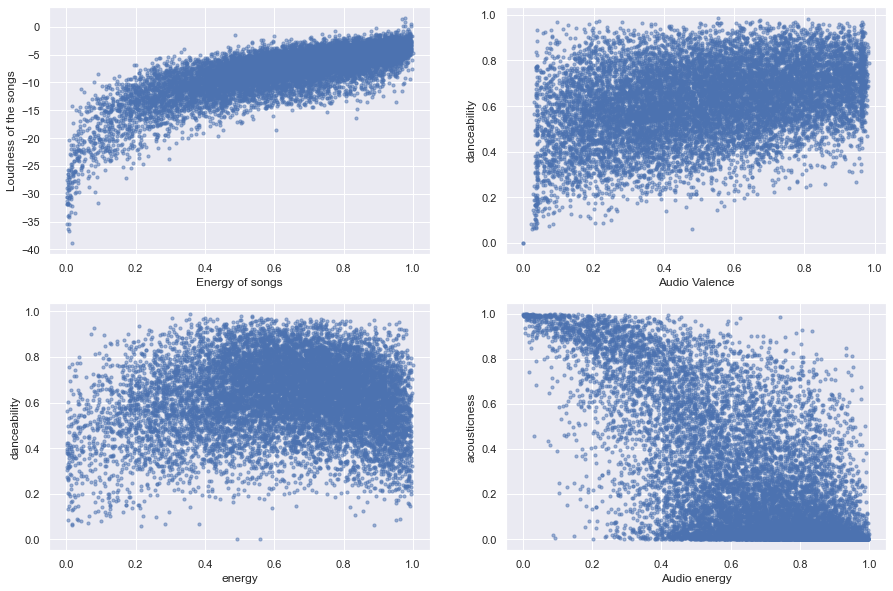

In [102]:
fig, ax = plt.subplots(2,2, figsize=(15, 10))
ax[0,0].scatter(x = songs['energy'], y = songs['loudness'],s=10,alpha=0.5)
ax[0,0].set_xlabel("Energy of songs")
ax[0,0].set_ylabel("Loudness of the songs")

ax[0,1].scatter(x = songs['audio_valence'], y = songs['danceability'],s=10,alpha=0.5)
ax[0,1].set_xlabel("Audio Valence")
ax[0,1].set_ylabel("danceability")

ax[1,0].scatter(x = songs['energy'], y = songs['danceability'],s=10,alpha=0.5)
ax[1,0].set_xlabel("energy")
ax[1,0].set_ylabel("danceability")

ax[1,1].scatter(x = songs['energy'], y = songs['acousticness'],s=10,alpha=0.5)
ax[1,1].set_xlabel("Audio energy")
ax[1,1].set_ylabel("acousticness")

[Text(0.5, 1.0, 'top 25 popular songs by duration')]

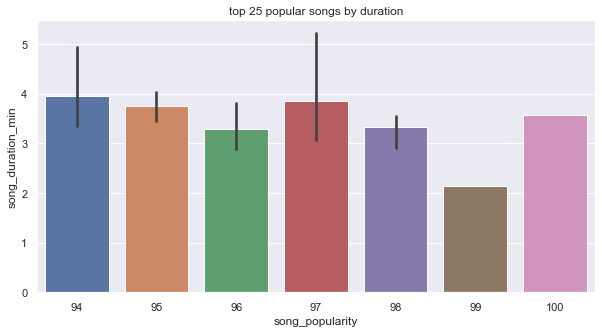

In [103]:
#More Descriptive Analysis to show the top 25 popular songs and their songs duration in Minutes- Bar Plot

most_popular= songs.sort_values("song_popularity", ascending = False).head(25)
plt.figure(figsize=(10,5))
sns.barplot(y="song_duration_min",x="song_popularity", data= most_popular).set(title="top 25 popular songs by duration")

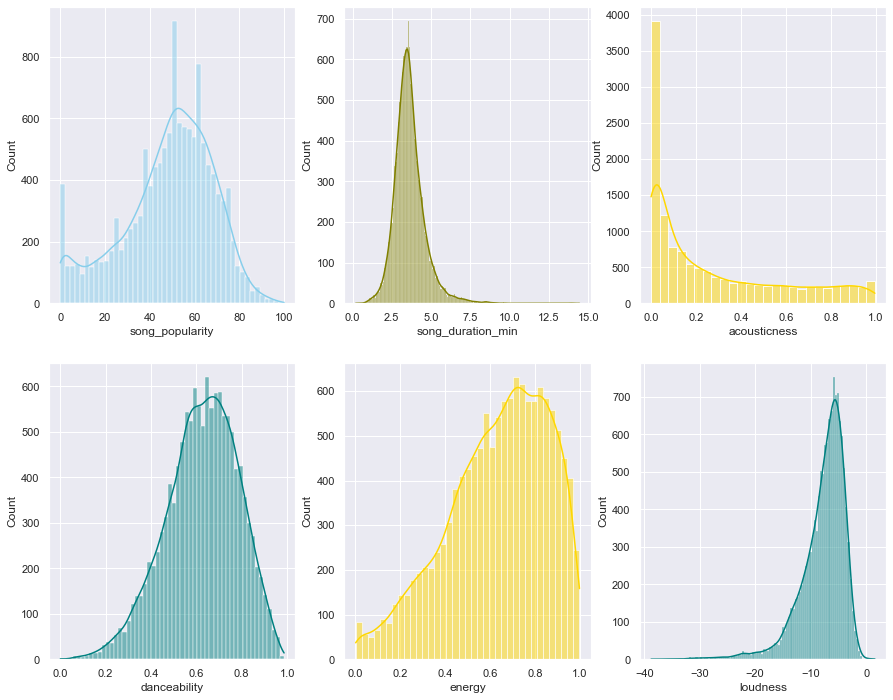

In [104]:
# Histogram Plot describing the various characterstics for a song
#Checking the data distribution
fig, axs = plt.subplots(2, 3, figsize=(15, 12))

sns.histplot(data=songs, x="song_popularity", kde=True, color="skyblue", ax=axs[0,0])
sns.histplot(data=songs, x="song_duration_min", kde=True, color="olive", ax=axs[0,1])
sns.histplot(data=songs, x="acousticness", kde=True, color="gold", ax=axs[0,2])
sns.histplot(data=songs, x="danceability", kde=True, color="teal", ax=axs[1,0])
sns.histplot(data=songs, x="energy", kde=True, color="gold", ax=axs[1,1])
sns.histplot(data=songs, x="loudness", kde=True, color="teal", ax=axs[1,2])
    
plt.show()
#We will standardise the data as it has high variation in its distribution
#We notice the song popularity distribution to be skewed to the right, 
#implying that it is difficult to get a song a high popularity score

# Regression Model

<AxesSubplot:xlabel='energy', ylabel='audio_valence'>

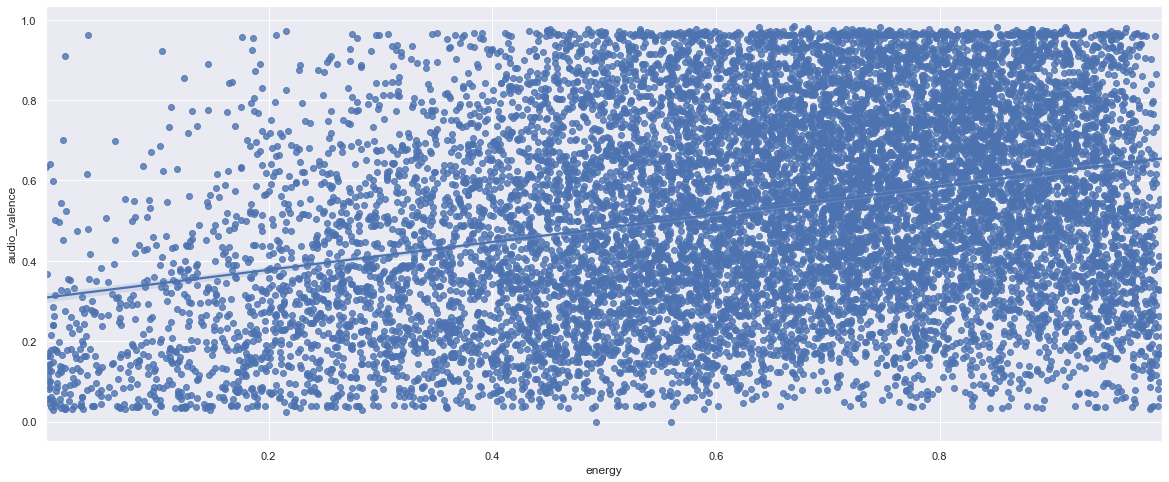

In [105]:
#We first try to fit our data to the regression model
#Regression plot  to show the correlation between Energy and Audio Valence
import seaborn as sns;
sns.set_theme(color_codes=True)
plt.figure(figsize=(20,8))
sns.regplot(data = songs, x="energy",y="audio_valence")

In [106]:
#Using Linear Regression model to get the R2 value, below we have R2 as 2.34 which is very low, 
#hence we will ignore the linear regression model for our target variable 
#and look into classification models shown later below

from sklearn.linear_model import LinearRegression

model = LinearRegression() # creates a linear regression instance

songs['song_popularity'] = songs['song_popularity'].astype('object') 

numericalval = numerical_val = list(songs.select_dtypes(exclude = 'object'))

model.fit(songs[numericalval], songs['song_popularity']) 
# fits the data to find the model coeffs
print('Model coefficients:') 
print(model.coef_)
print('\n')
print('R2 value: ' + str(round(100*model.score(songs[numericalval], 
                                               songs['song_popularity']), 2)))

# The R square value is very low, thus we will try classification models as well.

Model coefficients:
[-0.16165945 -3.22189921  6.12985107 -8.27898989 -7.00884169  0.01130459
 -3.74995818  0.35943193  0.21253586 -3.24337869 -0.01416933  0.94282145
 -6.24616897]


R2 value: 2.28


In [107]:
#Below shows the respresentation of the error,which is the difference between the actual(from the dataset) 
#and predicted( from linear regression) values for our target variable "Song_Popularity"

pred_vs_actual = pd.DataFrame()
pred_vs_actual['actual'] = songs['song_popularity']
pred_vs_actual['predicted'] = np.round(model.predict(songs[numericalval]), 0)
#pred_vs_actual['actual']
#pred_vs_actual['predicted']
pred_vs_actual['error'] = pred_vs_actual['actual'] - pred_vs_actual['predicted']
print(pred_vs_actual)


      actual  predicted error
0         73       51.0  22.0
1         66       50.0  16.0
2         76       50.0  26.0
3         74       50.0  24.0
4         56       49.0   7.0
...      ...        ...   ...
18827     55       51.0   4.0
18830     60       50.0  10.0
18832     23       51.0 -28.0
18833     55       49.0   6.0
18834     60       49.0  11.0

[13066 rows x 3 columns]


In [108]:
songs['song_popularity'] = songs['song_popularity'].astype('float64') 

In [109]:
songs.dtypes

song_popularity      float64
song_duration_min    float64
acousticness         float64
danceability         float64
energy               float64
instrumentalness     float64
key                    int64
liveness             float64
loudness             float64
audio_mode             int64
speechiness          float64
tempo                float64
time_signature         int64
audio_valence        float64
dtype: object

# Classification Models

In [110]:
# top 10% of songs identified based on popularity are targeted as "popular"
songs["song_popularity"].quantile(0.90)

72.0

In [111]:
# replaces all songs with a popularity less than 78 with a 0
# replaces all songs with a popularity greater than 0 with a 1

songs.loc[(songs['song_popularity'] < 71, 'song_popularity')] = 0
songs.loc[(songs['song_popularity'] > 0, 'song_popularity')] = 1

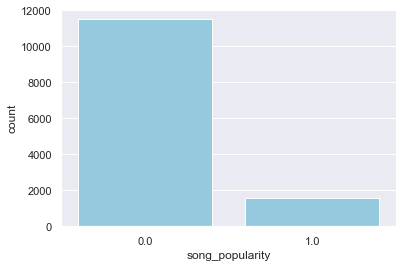

In [112]:
ax = sns.countplot(x='song_popularity', data = songs,
                  color = 'skyblue')
#There is a class imbalance in our target variable.

In [113]:
from sklearn.preprocessing import StandardScaler

numerical_val = list(set(songs.columns) - set(songs.dtypes[songs.dtypes == object].index))

new_col = [i+'' for i in numerical_val]

array = songs[numerical_val].values

data_scaler = StandardScaler().fit(array)

songs[new_col] = pd.DataFrame(data_scaler.transform(array))

In [114]:
# drops all rows with NaN values

songs=songs.dropna(how='all')


In [115]:
songs.shape

(9906, 14)

In [116]:
songs.dtypes

song_popularity      float64
song_duration_min    float64
acousticness         float64
danceability         float64
energy               float64
instrumentalness     float64
key                  float64
liveness             float64
loudness             float64
audio_mode           float64
speechiness          float64
tempo                float64
time_signature       float64
audio_valence        float64
dtype: object

In [117]:
# converts floats to int

songs = songs.astype(int)

In [73]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [118]:
#Dealing with the class imbalance

from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)

input_var = list(set(songs.columns) - set(['song_popularity']))

X, Y = os.fit_resample(songs[songs.columns.difference(['song_popularity'])], songs['song_popularity']) 
X = pd.DataFrame(X, columns = input_var)
y = pd.DataFrame(Y, columns = ['song_popularity'])

In [119]:
# splits the dataset into training and testing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=45)

In [120]:
lr = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr')
lr.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', random_state=0)

In [121]:
dt = DecisionTreeClassifier(criterion = 'gini', splitter='best', max_depth=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15)

In [122]:
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=0)

<AxesSubplot:>

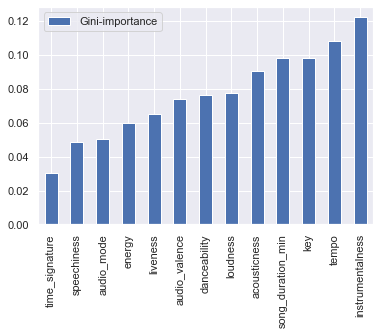

In [129]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(songs[input_var], dt.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=90)

In [124]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [125]:
def get_performance(actual_Y, pred_Y):
    cm = confusion_matrix(actual_Y, pred_Y)
    total = sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
    specificity = cm[1,1]/(cm[1,0]+cm[1,1])
    return accuracy, sensitivity, specificity

In [126]:
pred_Y_lr = lr.predict(X_test) # predicts the Y given the fitted model lr

pred_Y_dt = dt.predict(X_test) # predicts the Y given the fitted model dt

pred_Y_rf = rf.predict(X_test) # predicts the Y given the fitted model rf

pred_Y_knn = knn.predict(X_test) # predicts the Y given the fitted model knn

In [127]:
# accuracy, sensitivity, aand specificity for model lr
accuracy_lr, sensitivity_lr, specificity_lr = get_performance(y_test, pred_Y_lr)


# accuracy, sensitivity, aand specificity for model dt
accuracy_dt, sensitivity_dt, specificity_dt = get_performance(y_test, pred_Y_dt)


# accuracy, sensitivity, aand specificity for model rf
accuracy_rf, sensitivity_rf, specificity_rf = get_performance(y_test, pred_Y_rf)

# accuracy, sensitivity, aand specificity for model knn
accuracy_knn, sensitivity_knn, specificity_knn = get_performance(y_test, pred_Y_knn)

In [128]:
# Builds a dataframe using the performance indicators so that we can compare the models easily

perf = pd.DataFrame([accuracy_lr, accuracy_dt,accuracy_rf,accuracy_knn], 
                    columns = ['accuracy'], 
                    index = ['Logistic Regression',
                             'Decision Trees', 'Random Forest','K-NN'])

perf['sensitivity'] = np.asarray([sensitivity_lr,
                                  sensitivity_dt, 
                                  sensitivity_rf,
                                  sensitivity_knn])

perf['specificity'] = np.asarray([specificity_lr,
                                  specificity_dt,
                                  specificity_rf,
                                  specificity_knn])

perf

,accuracy,sensitivity,specificity
Logistic Regression,0.634814,0.511188,0.756654
Decision Trees,0.723861,0.572145,0.873384
Random Forest,0.672348,0.496528,0.845627
K-NN,0.700306,0.589506,0.809506
